## Question 02


In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv('College1.csv')
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
data['Grad.Rate'].unique()

array([ 60,  56,  54,  59,  15,  55,  63,  73,  80,  52,  76,  74,  68,
        69, 100,  46,  34,  48,  70,  65,  88,  58,  71,  85,  79,  91,
        72,  84,  49,  82,  35,  51,  75,  53,  96,  67,  18,  33,  97,
        89,  93,  78,  83,  61,  81,  64,  62, 118,  24,  66,  47,  50,
        21,  87,  77,  43,  95,  37,  99,  45,  42,  98,  94,  38,  86,
        44,  22,  57,  29,  36,  39,  40,  26,  90,  92,  32,  27,  41,
        31,  10,  30], dtype=int64)

In [4]:
data.drop(['Unnamed: 0', 'Private'], axis=1, inplace=True)

In [5]:
X = data.drop('Outstate', axis=1)
Y = data['Outstate']

In [6]:
X.head(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,6450,750,1500,29,30,12.2,16,10527,56


## Part A

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((621, 16), (156, 16))

## Part A

In [8]:
aic = []
bic = []
r2 = []
rmse = []
nff = []

for i in range(1, 16): ## number of columns

    features_selector_forward = sfs(LinearRegression(),
                    k_features=i, 
                    forward=True, 
                    verbose=0, 
                    cv=5, n_jobs=-1 )

    features_selector_forward.fit(x_train, y_train)
    
    mod = sm.GLS(y_train, x_train[list(features_selector_forward.k_feature_names_)]).fit()
    y_pred = mod.predict(x_test[list(features_selector_forward.k_feature_names_)])
    
    mod_aic = mod.aic
    mod_bic = mod.bic
    mod_r2 = r2_score(y_test, y_pred)
    mod_rmse = sqrt(mean_squared_error(y_test, y_pred))
    
    aic.append(mod_aic)
    bic.append(mod_bic)
    r2.append(mod_r2)
    rmse.append(mod_rmse)
    nff.append(i)

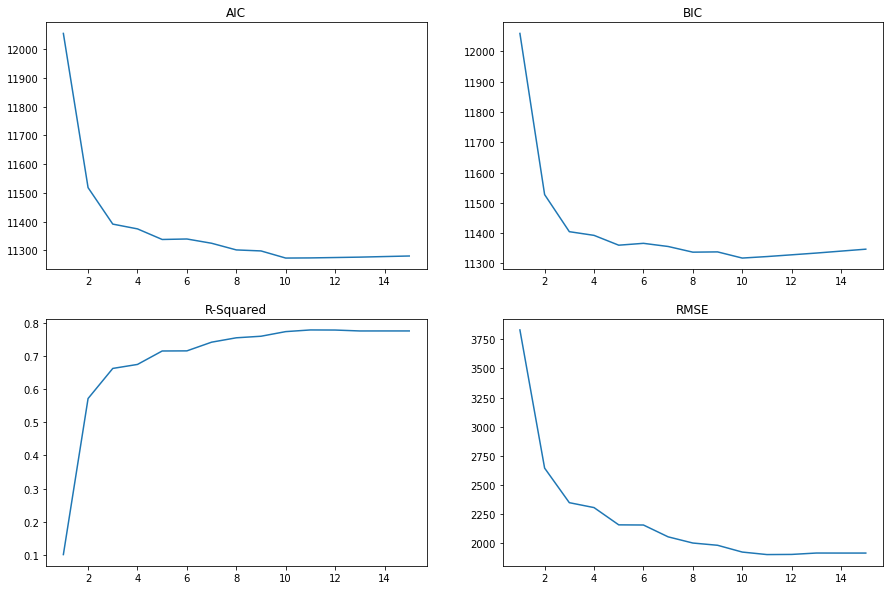

In [9]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(nff, aic)
plt.title("AIC")

plt.subplot(2, 2, 2)
plt.plot(nff, bic)
plt.title("BIC")

plt.subplot(2, 2, 3)
plt.plot(nff, r2)
plt.title("R-Squared")

plt.subplot(2, 2, 4)
plt.plot(nff, rmse)
plt.title("RMSE")

plt.show()

## 
A lower AIC and BIC scores means the model is fitting good.

The possible answer for the number of good parametrs is 10

## Part B

    -- Lets train the model with taking just the 10 parameters

In [10]:
features_selector_forward = sfs(LinearRegression(),
                k_features=10, 
                forward=True, 
                verbose=0, 
                cv=5, n_jobs=-1 )

features_selector_forward.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=10,
                          n_jobs=-1)

In [11]:
x_train = x_train[list(features_selector_forward.k_feature_names_)]
x_test = x_test[list(features_selector_forward.k_feature_names_)]

In [12]:
from pygam import LinearGAM
gam_model = LinearGAM().gridsearch(x_train.values, y_train.values)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [13]:
gam_model.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      37.091
Link Function:                     IdentityLink Log Likelihood:                                 -9942.4488
Number of Samples:                          621 AIC:                                            19961.0796
                                                AICc:                                           19966.1973
                                                GCV:                                          4010817.7966
                                                Scale:                                        3582049.0087
                                                Pseudo R-Squared:                                    0.791
Feature Function                  Lam

c:\Users\Shankii\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


## Part C

In [14]:
y_pred = gam_model.predict(x_test.values)
print("RMSE = ", sqrt(mean_squared_error(y_test, y_pred)))
print(gam_model.statistics_['AIC'], gam_model.statistics_['pseudo_r2']['explained_deviance'])
print("RSS = ", np.sum(np.square(y_pred - y_test)))


RMSE =  1803.0139370231398
19961.0796450532 0.7910181713559215
RSS =  507134044.10755056


## Part D

 -- Can't really say which are linear and which are not

 -- Lets doo the Hypothesis testing:

    Hypothesis Testing
    H0 = The variables are non-linear
    H1 = The variables are linear

In [18]:
for i in X[list(features_selector_forward.k_feature_names_)].columns:
    coeff, pvalue = pearsonr(X[i], Y)
    print("{} vs {}: pvalue = {}".format(i, "Outstate", pvalue))

Apps vs Outstate: pvalue = 0.16247452380683305
Accept vs Outstate: pvalue = 0.4734580801339919
Top10perc vs Outstate: pvalue = 5.459242638343985e-66
F.Undergrad vs Outstate: pvalue = 1.234045211673653e-09
Room.Board vs Outstate: pvalue = 4.135091124155116e-96
Terminal vs Outstate: pvalue = 1.6021725306645543e-32
S.F.Ratio vs Outstate: pvalue = 6.23752219753576e-64
perc.alumni vs Outstate: pvalue = 4.3495224626882205e-67
Expend vs Outstate: pvalue = 1.629891352881644e-103
Grad.Rate vs Outstate: pvalue = 1.6289269593118119e-68


## P value < alpha: Reject H0

-> we will reject H0 for the variables except for Apps and Accept

-> since for those variables: p-value > alpha 